# Exact diagonalization

The programme diagonalizes the Hamiltonian of a non-relativistic particle moving in a double well potential $V(x)=\lambda(x^2-\eta^2)^2$.

Input parameters, with default values:
- potential parameters: $\lambda=1$, $\eta=1.4$
- mass of the particle: $m=0.5$
- number of grid points for discretizing the Hamiltonian: $N_{grid}=1001$
- grid limits: $x_{min}=-5$, $x_{max}=5$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from tqdm.notebook import tqdm

In [2]:
# Parameters of the potential
Lambda = float(input("lambda = ") or 1);
eta = float(input("eta = ") or 1.4);
m = float(input("m = ") or 1/2);
hbar = 1;

lambda = 
eta = 
m = 


In [3]:
# Parameters of the grid
Ngrid = int(input("Ngrid = ") or 1001);
xmin = float(input("xmin = ") or -5);
xmax = float(input("xmax = ") or 5);

Ngrid = 
xmin = 
xmax = 


## Plot of $V(x)$

In [4]:
# Plotting the potential
xvec = np.linspace(xmin, xmax, Ngrid);     # vector spanning from xmin to xmax with Ngrid points
Vx = Lambda*(xvec**2-eta**2)**2;

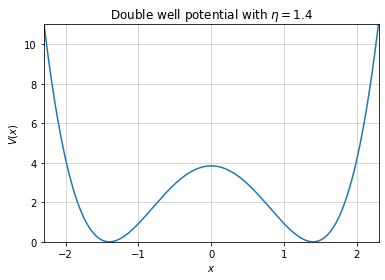

In [5]:
fig, ax = plt.subplots()
ax.plot(xvec, Vx);
ax.set_xlabel('$x$');
ax.set_ylabel('$V(x)$');
plt.xlim([-2.3, 2.3])
plt.ylim([0, 11])
plt.grid(linewidth=0.5);
plt.title('Double well potential with $\eta =$'+str(eta));

## Kinetic energy
The kinetic energy is discretized as follows:
$$ E_{kin}=-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}f(x) \quad\longrightarrow\quad -\frac{\hbar^2}{2m}\frac{f(x+dx)+f(x-dx)-2f(x)}{dx^2} $$

In [6]:
# Kinetic energy discretization
dx = np.diff(xvec).mean();     # grid resolution
diag = -2*np.ones(Ngrid);      # -2f(x)
offdiag = np.ones(Ngrid-1);    # f(x+dx) and f(x-dx)

d2grid = np.mat(np.diag(diag,0) + np.diag(offdiag,-1) + np.diag(offdiag,1))/dx**2;     # discretized second derivative

# Avoid problems at the edge of the grid
d2grid[0,:] = 0;
d2grid[Ngrid-1,:] = 0;

Ekin = -hbar**2/(2*m)*d2grid;

## Potential energy
The potential energy is just a diagonal matrix, with entries given by $V(x)$.

In [7]:
# Potential energy discretization
Epot = np.mat(np.diag(Vx, 0))

## Diagonalization
We now diagonalize the total Hamiltonian $H=E_{kin}+E_{pot}$.

In [8]:
# Total Hamiltonian diagonalization
H = Ekin + Epot;
w, v = LA.eig(H);

sortinds = np.argsort(w);     # returns the indices that would sort the array w
EigVals = w[sortinds];        # eigenvalues sorting
EigVecs = v[:,sortinds];      # corresponding eigenvectors sorting

Number of eigenvalues to be plotted = 


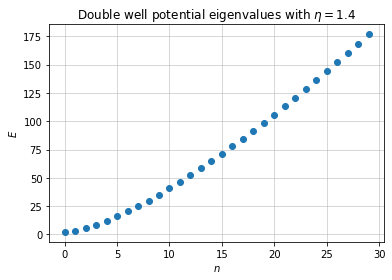

In [9]:
# Plotting the eigenvalues
Neig = int(input("Number of eigenvalues to be plotted = ") or 30);     # number of eigenvalues to be plotted
fig, ax = plt.subplots();
ax.plot(EigVals[0:Neig], 'o');
ax.set_ylabel('$E$');
ax.set_xlabel('$n$');
plt.grid(linewidth=0.5);
plt.title('Double well potential eigenvalues with $\eta =$'+str(eta));

Order of eigenfunction to be plotted = 


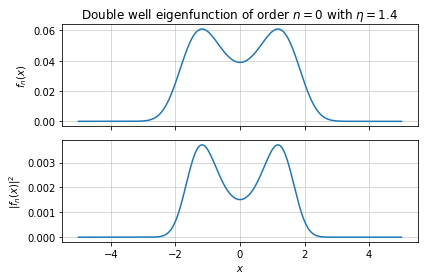

In [10]:
# Plotting the eigenfunctions
Neigf = int(input("Order of eigenfunction to be plotted = ") or 0);     # order of eigenfunction to be plotted

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(xvec, np.real(EigVecs[:,Neigf]))
ax1.set(title='Double well eigenfunction of order $n=$'+str(Neigf)+' with $\eta=$'+str(eta))
ax1.set_ylabel('$f_n(x)$');
ax1.grid(linewidth=0.5);

ax2.plot(xvec, np.power(np.abs(EigVecs[:,Neigf]), 2))
ax2.set_ylabel('$|f_n(x)|^2$');
ax2.set_xlabel('$x$');
ax2.grid(linewidth=0.5);
fig.tight_layout()

## Eigenvalues as a function of $\eta$
The procedure can be repeated for different values of $\eta$, to show that for $\eta\to\infty$ the eigenvalues tend to be degenerate.

Input parameters:
- bounds on $\eta$: $\eta_{min}$, $\eta_{max}$
- number of $\eta$ values: $N_{steps}$
- number of eigenvalues to be plotted: $N_{eig}$

In [13]:
def diag(etaMin, etaMax, Nsteps, Neig):
    
    eta_vector = np.zeros(Nsteps+1);
    eig_vector = np.zeros((Neig, Nsteps+1));
    
    for step in tqdm(range(Nsteps+1)):
        eta = etaMin + step*(etaMax-etaMin)/Nsteps;
        
        Vx = Lambda*(xvec**2-eta**2)**2;
        Epot = np.mat(np.diag(Vx, 0));
        
        H = Ekin + Epot;
        w, v = LA.eig(H);
        
        sortinds = np.argsort(w);
        EigVals = w[sortinds];
        
        eta_vector[step] = eta;
        
        for eig in range(Neig):
            eig_vector[eig][step] = EigVals[eig];

    fig, ax = plt.subplots();
    
    for eig in range(Neig):
        ax.plot(eta_vector, eig_vector[eig]);
        
    ax.set_ylabel('$E$');
    ax.set_xlabel('$\eta$');
    plt.grid(linewidth=0.5);
    plt.title('Double well potential eigenvalues as a function of $\eta$');

etaMin = 
etaMax = 
Nsteps = 
Neig = 


  0%|          | 0/51 [00:00<?, ?it/s]

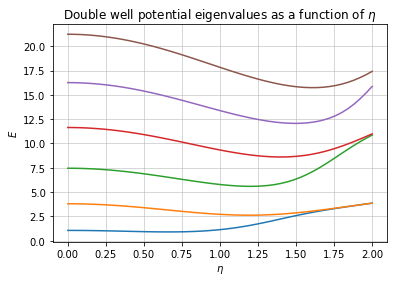

In [14]:
etaMin = float(input("etaMin = ") or 0);
etaMax = float(input("etaMax = ") or 2);
Nsteps = int(input("Nsteps = ") or 50);
Neig = int(input("Neig = ") or 6)
diag(etaMin, etaMax, Nsteps, Neig);